In [1]:
from google.colab import files
uploaded = files.upload()

Saving employees.csv to employees.csv


In [7]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
file = "employees.csv"

file_size = os.path.getsize(file)
print(f"The file size is {file_size} bytes")

employees_df = pd.read_csv("employees.csv")
print(f"The total number of records are {len(employees_df)}")

The file size is 3030111 bytes
The total number of records are 20000


In [22]:
name_check = employees_df['name'].isnull().sum()
print(f"Existence Assertion : Non null NAME field value {name_check} ")

eid_check = employees_df['eid'].isnull().sum()
print(f"Existence Assertion : Non null EID field value {eid_check}")

Existence Assertion : Non null NAME field value 19 
Existence Assertion : Non null EID field value 0


In [63]:
employees_df['hire_date'] = pd.to_datetime(employees_df['hire_date'], errors='coerce')
pre_2015 = employees_df[employees_df['hire_date'] < '2015-01-01']
print(f"Limit Assertion : Employee was hired no earlier than 2015 is false and the count is {len(pre_2015)}")

post_2015 = employees_df[employees_df['hire_date'] > '2015-01-01']
print(f"Limit Assertion : Employee was hired no earlier than 2015 is true and the count is {len(post_2015)}")

Limit Assertion : Employee was hired no earlier than 2015 is false and the count is 18
Limit Assertion : Employee was hired no earlier than 2015 is true and the count is 19982


In [60]:
pay = employees_df[employees_df['salary'] < 75000]
print(f"Limit Assertion : Employee salary is lesser than $75K - {len(pay)}")

Limit Assertion : Employee salary is lesser than $75K - 15181


In [69]:
employees_df['birth_date'] = pd.to_datetime(employees_df['birth_date'], errors='coerce')
employees_df['hire_date'] = pd.to_datetime(employees_df['hire_date'], errors='coerce')

invalid = employees_df[employees_df['birth_date'] >= employees_df['hire_date']]
print(f"Intra-Record Assertion : Employee was born before they were hired is false, count is {len(invalid)}")

valid = employees_df[employees_df['birth_date'] <= employees_df['hire_date']]
print(f"Intra-Record Assertion : Employee was born before they were hired is true, count is {len(valid)}")

Intra-Record Assertion : Employee was born before they were hired is false, count is 13
Intra-Record Assertion : Employee was born before they were hired is true, count is 19987


In [77]:
manager_check = employees_df[employees_df['eid'] != employees_df['reports_to']]
print(f"Intra-Record Assertion : Employees who has a reporting manager and not self {len(manager_check)}")

Intra-Record Assertion : Employees who has a reporting manager and not self 19999


In [84]:
manager = set(employees_df['reports_to'])
employee = set(employees_df['eid'])

check = manager - employee
unknown_employee= employees_df[employees_df['reports_to'].isin(check)]
print(f"Inter-Record Assertion : Employees who has a manager who is a known employee {len(unknown_employee)}")

Inter-Record Assertion : Employees who has a manager who is a known employee 7673


In [91]:
duplicate_phones = employees_df[employees_df.duplicated('phone', keep=False)]
print(f"Inter-Record Assertion : Employees who has duplicate phone records {len(duplicate_phones)} ")

Inter-Record Assertion : Employees who has duplicate phone records 2 


In [98]:
city_value = employees_df['city'].value_counts()
one_emp_city = city_value[city_value <= 1]

print(f"Summary Assertion : Each city has more than one employee is false, count is {len(one_emp_city)}")

Summary Assertion : Each city has more than one employee is false, count is 10024


In [104]:
country_value = employees_df['country'].value_counts()

more_emp_country = country_value[country_value >= 3]
print(f"Summary Assertion : Each country has more than 3 employees is true, count is {len(more_emp_country)} ")

Summary Assertion : Each country has more than 3 employees is true, count is 3 


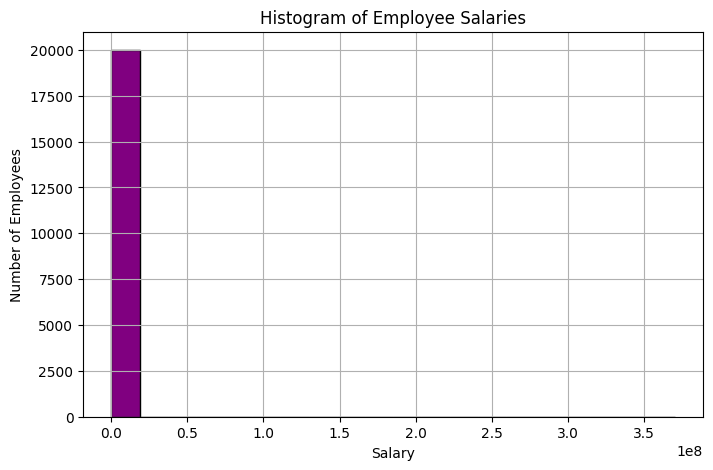


Statistical Assertion: 96.97% of employees earn between 50K and 250K
The data satisfies the new statistical assertion.


In [112]:
salaries = []

for _, row in employees_df.iterrows():
    try:
        salary = float(row['salary'])
        salaries.append(salary)
    except ValueError:
        continue

plt.figure(figsize=(8, 5))
plt.hist(salaries, bins=20, color='purple', edgecolor='black')
plt.title('Histogram of Employee Salaries')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.grid(True)
plt.show()

# Salary ranging from 100K and 300K

in_range = sum(1 for s in salaries if 50000 <= s <= 250000)
percentage_in_range = (in_range / len(salaries)) * 100

print(f"\nStatistical Assertion: {percentage_in_range:.2f}% of employees earn between 50K and 250K")

if percentage_in_range >= 90:
    print("The data satisfies the new statistical assertion.")
else:
    print("The data does NOT satisfy the new statistical assertion.")
